## Word Embeddings and T-SNE exercise

## Exercise 1: Word Embeddings and t-SNE


A dataset of 10,000 English job ads from job.ch is provided. Your task is to use the word2vec model of the gensim package to map words from the vocabulary to vectors of real numbers. Use t-SNE as a way to visualize these word embeddings. There is a helper file provided in the materials section. Like in any classical NLP task the steps in this analysis are:

Clean the data, remove stop words

Build a corpus

Build and train a Word2Vec model - Play with different parameter settings e.g. window-size etc and save your models

Visualize the resulting model using t-SNE

What do you see in your t-SNE results?

Use-cases:

Extract the 10 most similar words to a given word (e.g. ‘python’)

TSNE is pretty useful when it comes to visualizing similarity between objects. It works by taking a group of high-dimensional (100 dimensions via Word2Vec) vocabulary word feature vectors, then compresses them down to 2-dimensional x,y coordinate pairs. The idea is to keep similar words close together on the plane, while maximizing the distance between dissimilar words.


Like any classical NLP task the steps in this analysis will be

- Clean data
- Build a corpus
- Train word2vec
- Visualize using t-sne

In [3]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
import nltk

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import os

In [12]:
df = pd.read_pickle("df_clean_newwer_new.pkl")
df.shape

(333459, 10)

In [4]:
df.head()

,identifier,speaker_id,file,corpus,configuration,machine,reference.text,hypothesis.text,scoring.wer,recomputed_wer
1,sw2061A-ms98-a-0123,1167,amazon__8000_8__switchboard_segmented.json,switchboard_segmented,amazon__8000_8,amazon,yeah because see what happens is they have a g...,yeah because see what happens is they have a g...,0.000000,0.000000
2720,sw2831A-ms98-a-0046,1139,amazon__8000_8__switchboard_segmented.json,switchboard_segmented,amazon__8000_8,amazon,i think people are going to follow the stock m...,i think people are going to follow the stock m...,0.000000,0.000000
2721,sw2567B-ms98-a-0068,1159,amazon__8000_8__switchboard_segmented.json,switchboard_segmented,amazon__8000_8,amazon,good don't ever drink scotch it's terrible,good don't ever drink scott it's terrible,0.142857,0.142857
2723,sw4276B-ms98-a-0033,1532,amazon__8000_8__switchboard_segmented.json,switchboard_segmented,amazon__8000_8,amazon,so they're going to continue,so they're going to continue,0.000000,0.000000
2727,sw3117B-ms98-a-0031,1312,amazon__8000_8__switchboard_segmented.json,switchboard_segmented,amazon__8000_8,amazon,and see back when i went to school there when ...,and see back when i went to school there when ...,0.133333,0.133333


In [8]:
#%debug
STOP_WORDS = nltk.corpus.stopwords.words('english')

def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = re.sub("\s\s+", " ", sentence)
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in STOP_WORDS:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

def clean_dataframe(data):
    "drop nans, then apply 'clean_sentence' function to question1 and 2"
    data = data[data['reference.text'] == data['reference.text']]  # removes nan since nan == nan -> False
    
    for col in ['reference.text']:
        data[col] = data[col].apply(clean_sentence)
    
    return data



In [9]:
df = clean_dataframe(df)
df.head(5)

,identifier,speaker_id,file,corpus,configuration,machine,reference.text,hypothesis.text,scoring.wer,recomputed_wer
1,sw2061A-ms98-a-0123,1167,amazon__8000_8__switchboard_segmented.json,switchboard_segmented,amazon__8000_8,amazon,yeah see happens good backup policy anybody fix,yeah because see what happens is they have a g...,0.000000,0.000000
2720,sw2831A-ms98-a-0046,1139,amazon__8000_8__switchboard_segmented.json,switchboard_segmented,amazon__8000_8,amazon,think people going follow stock market takes,i think people are going to follow the stock m...,0.000000,0.000000
2721,sw2567B-ms98-a-0068,1159,amazon__8000_8__switchboard_segmented.json,switchboard_segmented,amazon__8000_8,amazon,good dont ever drink scotch terrible,good don't ever drink scott it's terrible,0.142857,0.142857
2723,sw4276B-ms98-a-0033,1532,amazon__8000_8__switchboard_segmented.json,switchboard_segmented,amazon__8000_8,amazon,theyre going continue,so they're going to continue,0.000000,0.000000
2727,sw3117B-ms98-a-0031,1312,amazon__8000_8__switchboard_segmented.json,switchboard_segmented,amazon__8000_8,amazon,see back went school first entered school cost...,and see back when i went to school there when ...,0.133333,0.133333


In [13]:
df['reference.text'][0]

0           without the dataset the article is useless
0                 and each gene gives us a fingerprint
0    by the belly of sanct james what shall we poor...
0                          that's the way of the world
0    -grets only which simplifies it they only say ...
                           ...                        
0    men of selden's stamp don't stop at women and ...
0    i'm jane mcgonigal i'm a game designer i've be...
0           without the dataset the article is useless
0                          that's the way of the world
0    by the belly of sanct james what shall we poor...
Name: reference.text, Length: 112, dtype: object

In [108]:
#TO DO: complete the build_corpus function following the description
        #output example: [[''overview', 'business', 'area', 'project', 'resource'], ['work', 'strategic','programs']]

def build_corpus(data):
    "Creates a list of lists containing words"
    corpus = []
            
    return corpus

corpus = build_corpus(data)              
corpus[:1]

[['system',
  'engineerjob',
  'description',
  '',
  '',
  'overview',
  'business',
  'area',
  'project',
  'resource',
  'work',
  'strategic',
  'programs',
  'enterprise',
  'services',
  'department',
  'entire',
  'chief',
  'technology',
  'office',
  'within',
  'bank',
  'key',
  'deliveries',
  'based',
  'servicenow',
  'platform',
  'midserver',
  'infrastructure',
  'consists',
  'configuration',
  'management',
  'database',
  'cmdb',
  'multiple',
  'automatic',
  'semiautomatic',
  'integrations',
  'various',
  'tools',
  'applications',
  '',
  '',
  'key',
  'responsibilities',
  '',
  'exciting',
  'opportunity',
  'lead',
  'servicenow',
  'data',
  'integration',
  'engineering',
  'stream',
  'including',
  'development',
  'maintenance',
  'servicenow',
  'midserver',
  'infrastructure',
  'executing',
  'changes',
  '',
  'analysis',
  'incidents',
  'problem',
  'tickets',
  'role',
  'includes',
  'deep',
  'troubleshooting',
  'complex',
  'issues',
  'cod

In [27]:
sample=data.sample(frac=0.1)

In [28]:
sample

,Keywords,Job title,Date published,Alive until,Company name,Location,Company type,Contract type,Occupation,Job rank,Content,Industry,Official website,Canton initials,Canton name
8442,Data Manager,"General Manager, Switzerland Commercial",2019-04-03 00:00:00,2019-05-27 00:00:00,Dell SA,Le Grand-Saconnex,Large-scale entreprises,Unlimited employment,100,Position with responsibilities,general manager switzerland commercialgeneral ...,"Information technology, Telecom.",http://www.dell.ch/,VD,Vaud
4051,Data Manager,Business Development Director (m/f) Real World...,2019-03-20 00:00:00,2019-04-30 00:00:00,NaN,Basel,NaN,Unlimited employment,100,Executive position,business development director mf real world in...,NaN,NaN,BS,Basel
8478,Data Engineer,Manufacturing Engineer,2019-03-26 00:00:00,2019-04-09 00:00:00,STAAR Surgical AG,Nidau,Large-scale entreprises,Unlimited employment,100,Position with responsibilities,evo visian icl implantable lens works natural...,"Chemicals, Pharmaceuticals",http://www.staar.com,BE,Bern
4917,Analyst,Senior Financial Analyst,2019-03-14 00:00:00,2019-04-13 00:00:00,GSCF Ltd.,Zug,Small and medium-sized enterprises,Unlimited employment,100,Position with responsibilities,global supply chain finance ltd wwwgscfcom wo...,"Banking, Financial institutions",http://www.gscf.com,ZG,Zug
8422,Administrative Assistant,Admin Assistant,2019-05-14 00:00:00,2019-06-14 00:00:00,IQVIA Solutions GmbH,Rotkreuz,Small and medium-sized enterprises,Unlimited employment,100,Employee,admin assistantwould like work dynamic intercu...,"Chemicals, Pharmaceuticals",https://www.iqvia.com,ZG,Zug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7644,Electrical Engineer,Software Engineer (Drivers & Verification),2019-01-24 00:00:00,2019-06-24 00:00:00,u-blox AG,Thalwil,Large-scale entreprises,Unlimited employment,100,Position with responsibilities,software engineer drivers verificationvacancy ...,"Information technology, Telecom.",http://www.u-blox.com,ZH,Zurich
1726,PR Manager,PR Manager,2019-04-26 00:00:00,2019-05-21 00:00:00,Tissot,Le Locle,Small and medium-sized enterprises,Unlimited employment,100,Position with responsibilities,pr manager company tissot growing developing t...,"Consumer, Luxury goods industry",NaN,NE,Neuchatel
6484,Consultant,Project Manager Engineering - Utilities Lead,2019-04-20 00:00:00,2019-04-28 00:00:00,Manpower SA,Visp,Consultants,Unlimited employment,100,Employee,passionate clean black utilities gathered year...,"Recruitment agency, Staffing",http://www.manpower.ch,VS,Valais
9419,Machine Learning,Junior Software Engineer.,2018-12-24 00:00:00,2019-06-20 00:00:00,NaN,Cheseaux-Lausanne,NaN,Unlimited employment,100,Position with responsibilities,junior software engineer junior software engin...,NaN,NaN,VD,Vaud


In [31]:
len(sample['Content'])

1000

In [36]:
#TO DO: complete the build_corpus function following the description
        #output example: [[''overview', 'business', 'area', 'project', 'resource'], ['work', 'strategic','programs']]

def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for i in range(len(data['Content'])):
        corpus.append(data['Content'][i].split())  
    return corpus

corpus = build_corpus(data)              
corpus[:1]


[['system',
  'engineerjob',
  'description',
  'overview',
  'business',
  'area',
  'project',
  'resource',
  'work',
  'strategic',
  'programs',
  'enterprise',
  'services',
  'department',
  'entire',
  'chief',
  'technology',
  'office',
  'within',
  'bank',
  'key',
  'deliveries',
  'based',
  'servicenow',
  'platform',
  'midserver',
  'infrastructure',
  'consists',
  'configuration',
  'management',
  'database',
  'cmdb',
  'multiple',
  'automatic',
  'semiautomatic',
  'integrations',
  'various',
  'tools',
  'applications',
  'key',
  'responsibilities',
  'exciting',
  'opportunity',
  'lead',
  'servicenow',
  'data',
  'integration',
  'engineering',
  'stream',
  'including',
  'development',
  'maintenance',
  'servicenow',
  'midserver',
  'infrastructure',
  'executing',
  'changes',
  'analysis',
  'incidents',
  'problem',
  'tickets',
  'role',
  'includes',
  'deep',
  'troubleshooting',
  'complex',
  'issues',
  'code',
  'level',
  'open',
  'position

## Word2Vec
 model produces a vocabulary, with each word being represented by an n-dimensional numpy array (100 values in this example)

In [9]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=500, workers=4)
model.wv['python']

array([ 3.4386513e+00,  1.4256397e+00, -2.8777423e+00, -3.6330814e+00,
       -6.0896689e-01, -2.1314211e+00, -4.5544710e-03,  2.2404439e+00,
        1.3368822e+00,  8.1981903e-01, -8.6068660e-01, -1.1142971e-01,
        6.3166219e-01,  4.3628893e+00, -1.9962732e+00, -1.7457381e+00,
       -1.2517323e+00,  3.9987323e-01,  2.7771280e+00, -4.0891561e-01,
       -4.2140216e-01,  2.3500206e+00, -1.7672272e+00,  3.8392799e+00,
        1.3750604e+00, -2.6168196e+00,  1.6868058e+00,  8.9142704e-01,
        5.3311789e-01,  2.0513396e+00,  1.4302737e+00,  6.9142431e-01,
       -3.4222290e-01,  2.9182153e+00,  3.2770813e+00,  2.0800857e-01,
        2.2105613e+00, -5.6938601e-01,  1.1313443e+00,  7.9487078e-02,
        4.4132471e+00,  3.5346365e-01,  1.3943230e+00,  2.1272097e+00,
       -1.1164833e+00, -3.3741456e-01, -1.2565784e+00,  2.4391399e-01,
        5.9125918e-01,  2.4304321e+00, -2.4389106e-01,  6.1971027e-01,
       -5.2755743e-01, -2.9682237e-01,  1.6694126e+00, -1.5560163e+00,
      

## t-sne plot

In [11]:
#TO DO: Plot the word corpus in a two dimensional plane using dimensionality reduction techniques
def tsne_plot(model, wordlist = []):

    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [59]:
 model.wv.vocab

{'system': <gensim.models.keyedvectors.Vocab at 0x15d767f7128>,
 'description': <gensim.models.keyedvectors.Vocab at 0x15d767f7630>,
 'overview': <gensim.models.keyedvectors.Vocab at 0x15d767f7198>,
 'business': <gensim.models.keyedvectors.Vocab at 0x15d76fbd5c0>,
 'area': <gensim.models.keyedvectors.Vocab at 0x15d7701dac8>,
 'project': <gensim.models.keyedvectors.Vocab at 0x15d7701d780>,
 'resource': <gensim.models.keyedvectors.Vocab at 0x15d7701d080>,
 'work': <gensim.models.keyedvectors.Vocab at 0x15d76fea940>,
 'strategic': <gensim.models.keyedvectors.Vocab at 0x15d7716bb70>,
 'programs': <gensim.models.keyedvectors.Vocab at 0x15d7716bb38>,
 'enterprise': <gensim.models.keyedvectors.Vocab at 0x15d76ff4b70>,
 'services': <gensim.models.keyedvectors.Vocab at 0x15d76ff4748>,
 'department': <gensim.models.keyedvectors.Vocab at 0x15d76fa3b38>,
 'entire': <gensim.models.keyedvectors.Vocab at 0x15d76fa3550>,
 'chief': <gensim.models.keyedvectors.Vocab at 0x15d76fa3c18>,
 'technology': <ge

C:\Users\ooles\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


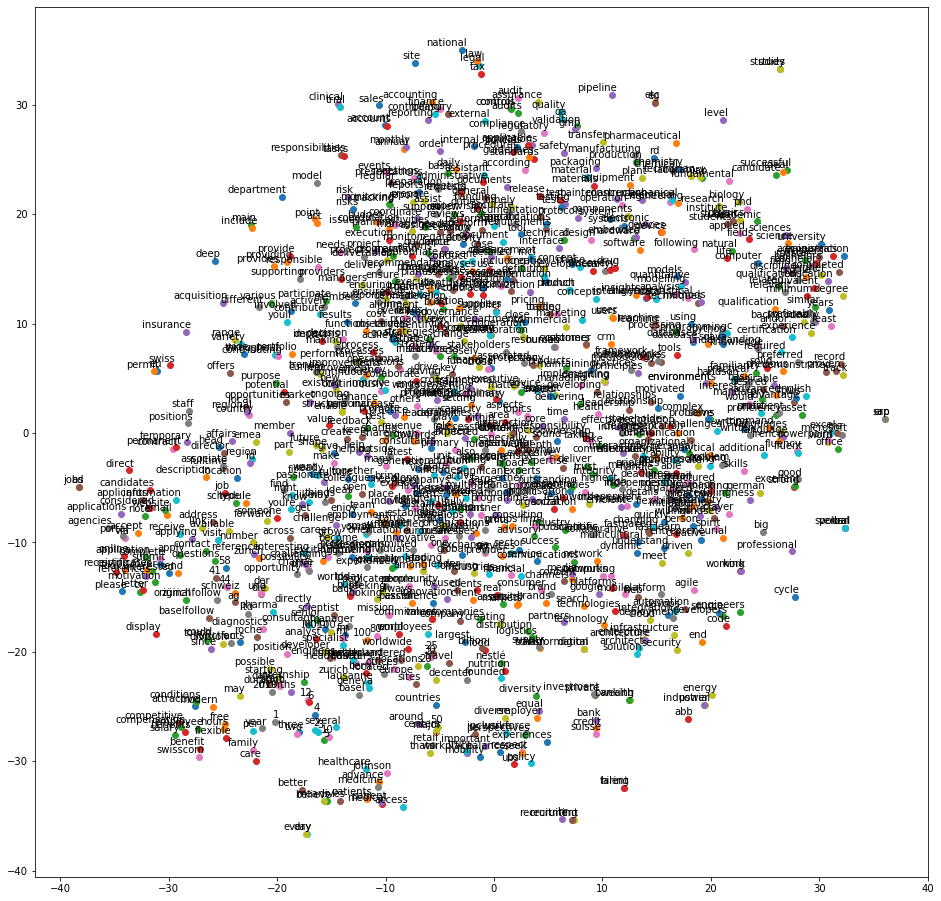

In [12]:
tsne_plot(model)

## Model

C:\Users\ooles\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


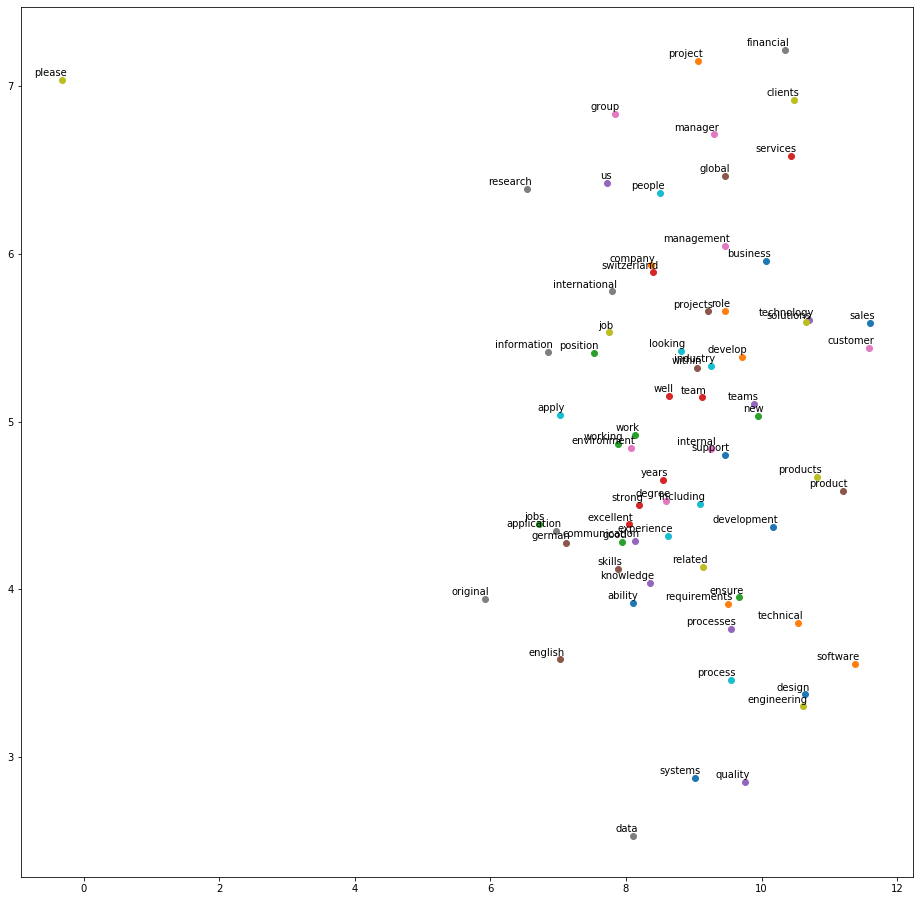

In [95]:
# A more selective model
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=5000, workers=4)
tsne_plot(model)

C:\Users\ooles\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


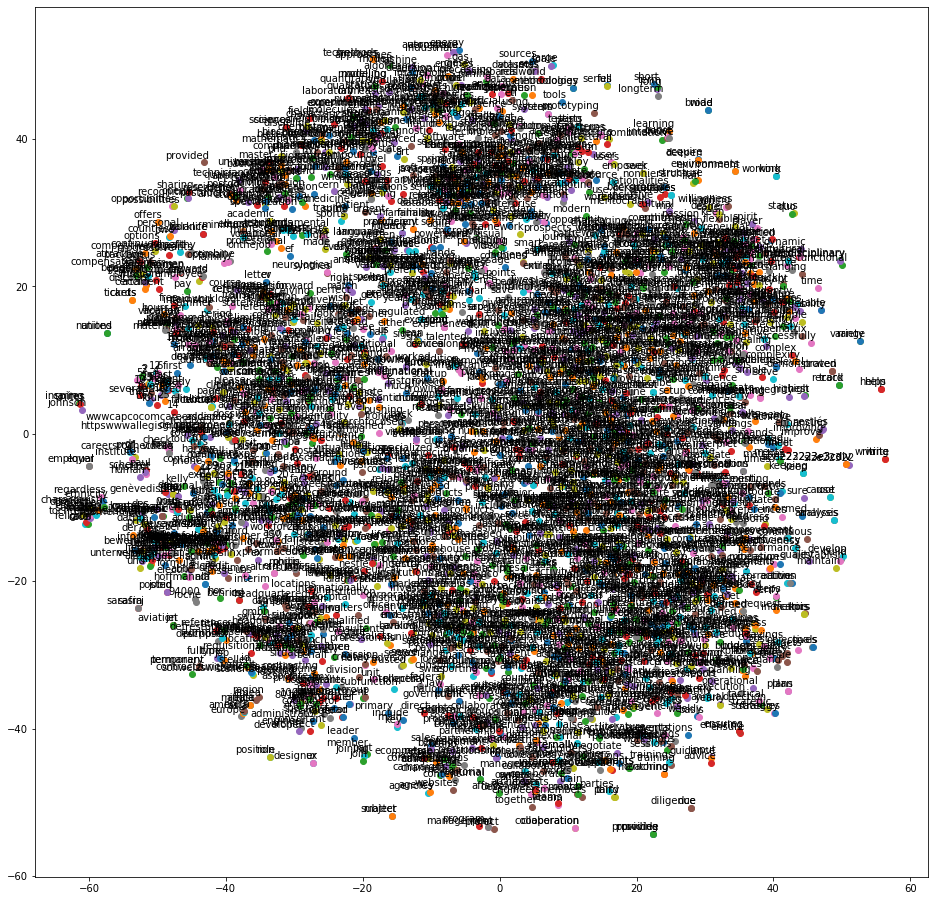

In [38]:
# A less selective model
model = word2vec.Word2Vec(corpus, size=100, window=5, min_count=100, workers=4)
tsne_plot(model)

## Let's find some similar words to our query

In [39]:
model = word2vec.Word2Vec(corpus, size=100, window=5, min_count=50, workers=4)

In [98]:
model.most_similar('data')

C:\Users\ooles\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('related', 0.3002382516860962),
 ('systems', 0.28829818964004517),
 ('information', 0.27441200613975525),
 ('experience', 0.26086941361427307),
 ('knowledge', 0.24972178041934967),
 ('group', 0.22491441667079926),
 ('including', 0.21846050024032593),
 ('research', 0.21563950181007385),
 ('software', 0.20901980996131897),
 ('business', 0.20398882031440735)]

In [148]:
wordlist

['related',
 'systems',
 'information',
 'experience',
 'knowledge',
 'group',
 'including',
 'research',
 'software',
 'business',
 'role',
 'working',
 'teams',
 'solutions',
 'within',
 'develop',
 'technology',
 'processes',
 'new',
 'team',
 'requirements',
 'ensure',
 'strong',
 'design',
 'quality',
 'good',
 'job',
 'management',
 'support',
 'ability',
 'internal',
 'work',
 'skills',
 'technical',
 'development',
 'financial',
 'communication',
 'years',
 'customer',
 'people',
 'environment',
 'product',
 'switzerland',
 'degree',
 'services',
 'process',
 'excellent',
 'position',
 'projects',
 'global',
 'manager',
 'original',
 'apply',
 'sales',
 'looking',
 'engineering',
 'english',
 'please',
 'clients',
 'us',
 'jobs',
 'well',
 'application',
 'project',
 'products',
 'industry',
 'german',
 'company',
 'international',
 'python',
 'telephone',
 'python',
 'python']

C:\Users\ooles\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.
C:\Users\ooles\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


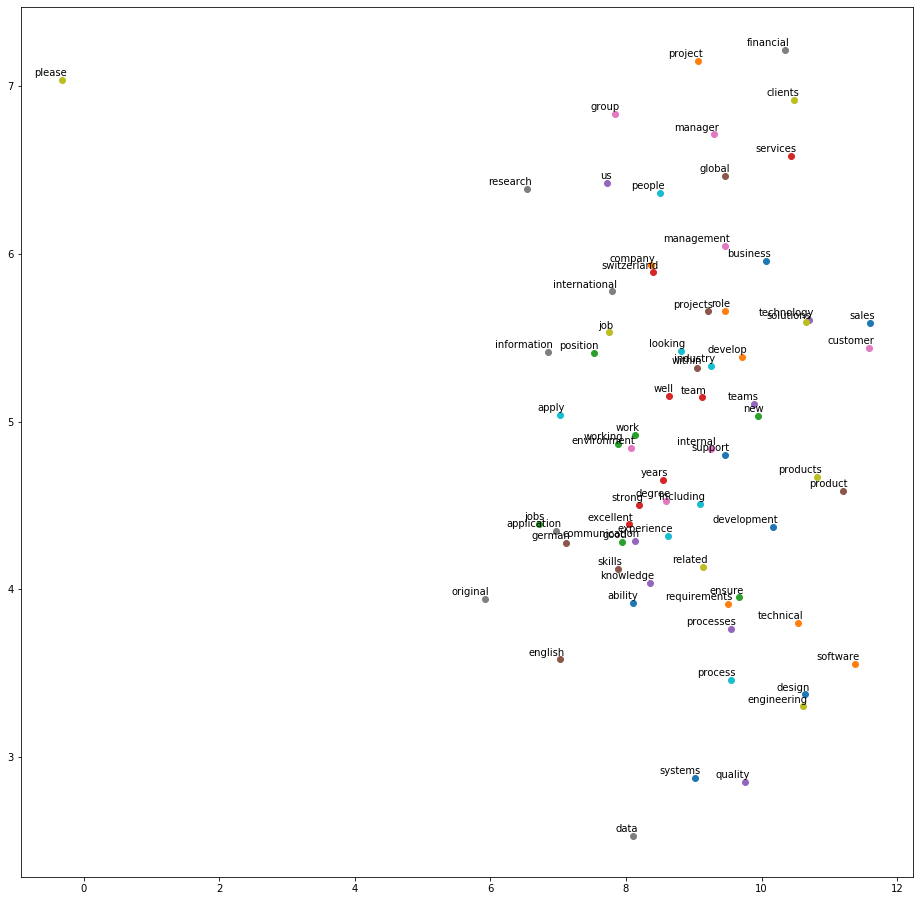

In [107]:
# TODO: Select a word and plot the words most similiar to it

search_word = 'data'
m_similar = model.most_similar(search_word, topn=100)

wordlist = [word for word, value in m_similar]
# add the word itself
wordlist.append("python")

# plot the selected word + the most similiar ones
tsne_plot(model, wordlist)



In [146]:
wordlist[-1]

'python'

In [147]:
len(wordlist)

73

C:\Users\ooles\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


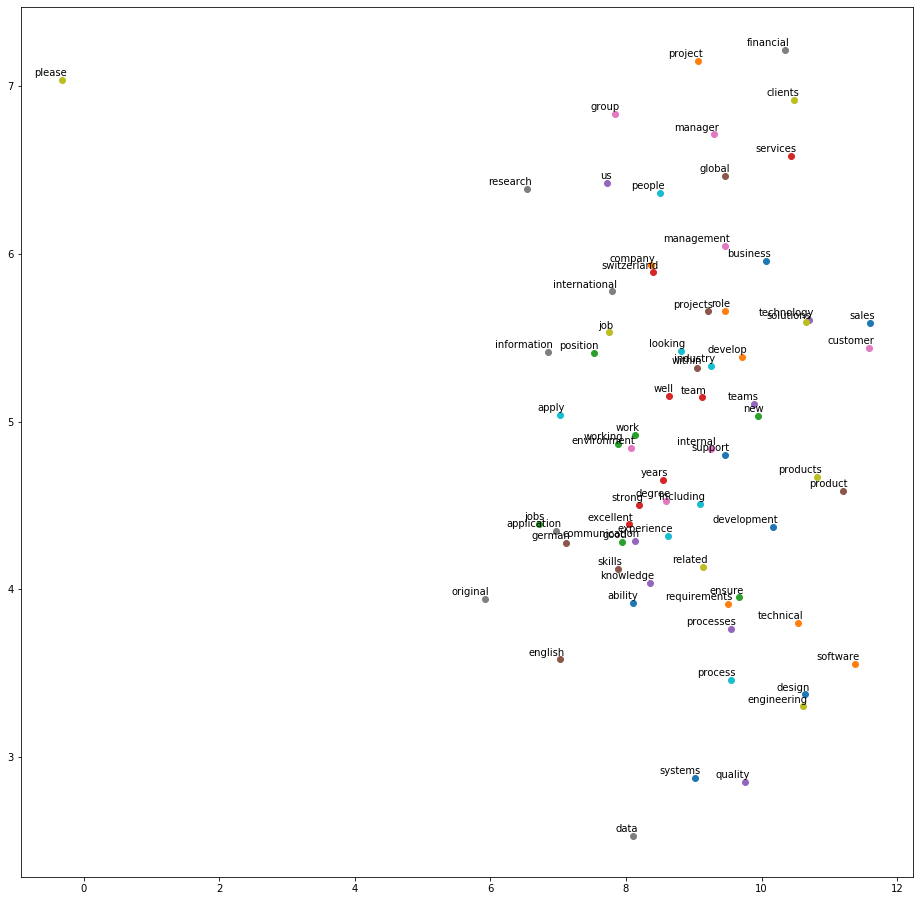

In [141]:
tsne_plot(model,wordlist)

In [134]:
any('python' for item in model.wv.vocab)

True

In [124]:

#TO DO: Plot the word corpus in a two dimensional plane using dimensionality reduction techniques
def tsne_plot100(model, wordlist = []):

    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in wordlist:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\ooles\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


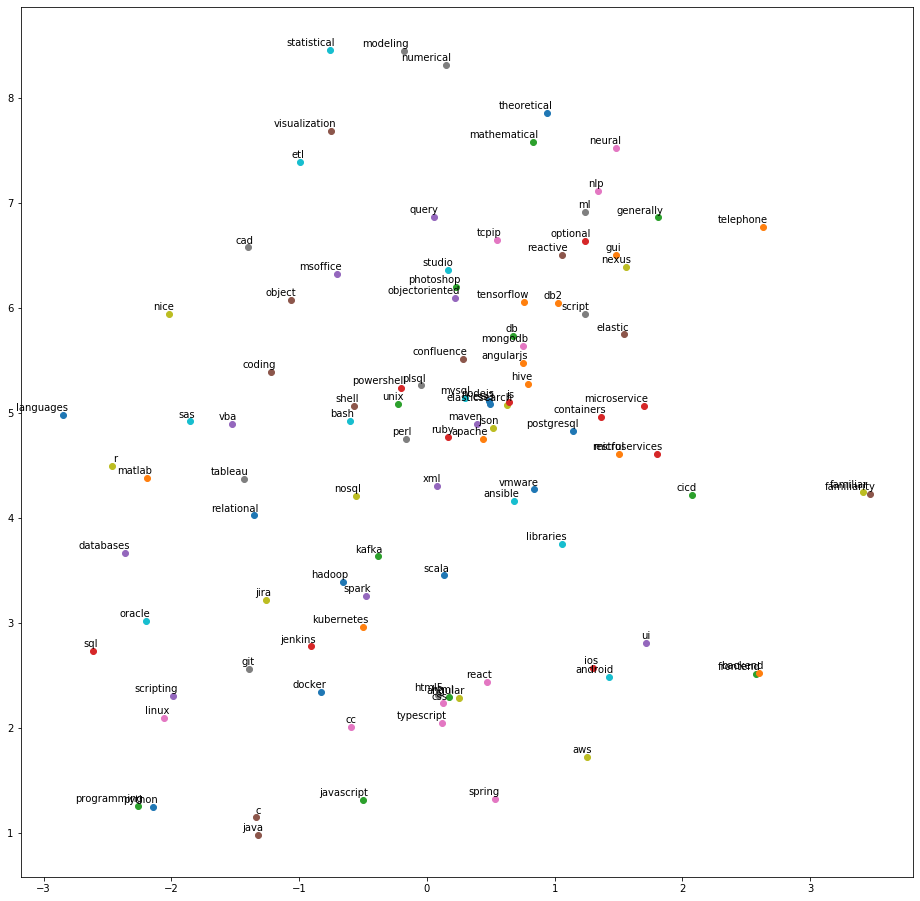

In [91]:
tsne_plot100(model,wordlist)

In [79]:
m_similar = model.most_similar(search_word, topn=1000)

C:\Users\ooles\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [80]:
m_similar[-1]

('generally', 0.18028013408184052)

In [89]:
wordlist.append("generally")